In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12,4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [3]:
df = pd.read_csv(r'D:\Rakamin\Loan Prediction Based on Customer Behavior\Training Data.csv')
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
df.info() #pengecekan data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [5]:
df.describe() #pengecekan nilai summary

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [6]:
df.isna().sum() #pengecekan data kosong

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [7]:
cata = ['Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE']
nums = ['Id','Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS','Risk_Flag']

In [8]:
df[nums].describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [9]:
df[cata].describe()

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
count,252000,252000,252000,252000,252000,252000
unique,2,3,2,51,317,29
top,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh
freq,226272,231898,176000,5957,1259,28400


In [10]:
for col in cata:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Married/Single:
single     226272
married     25728
Name: Married/Single, dtype: int64

Value count kolom House_Ownership:
rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64

Value count kolom Car_Ownership:
no     176000
yes     76000
Name: Car_Ownership, dtype: int64

Value count kolom Profession:
Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              51

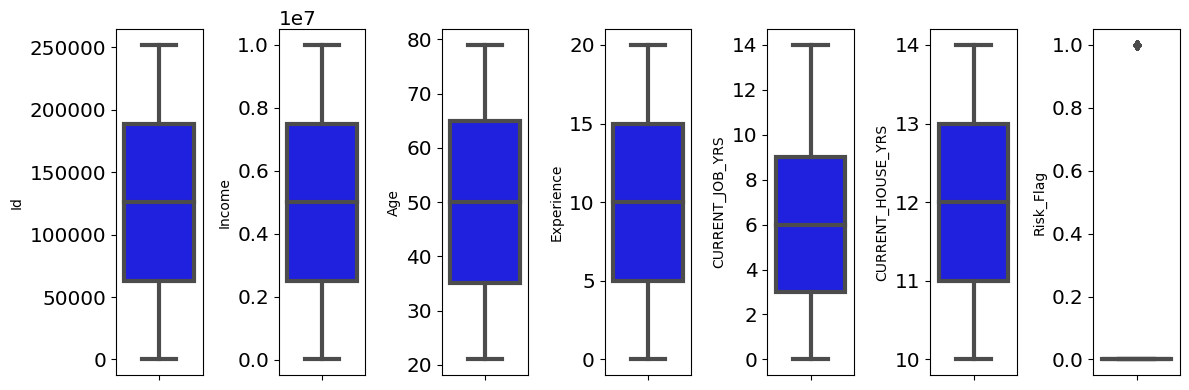

In [11]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color = 'blue', orient = 'v')
    plt.tight_layout()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

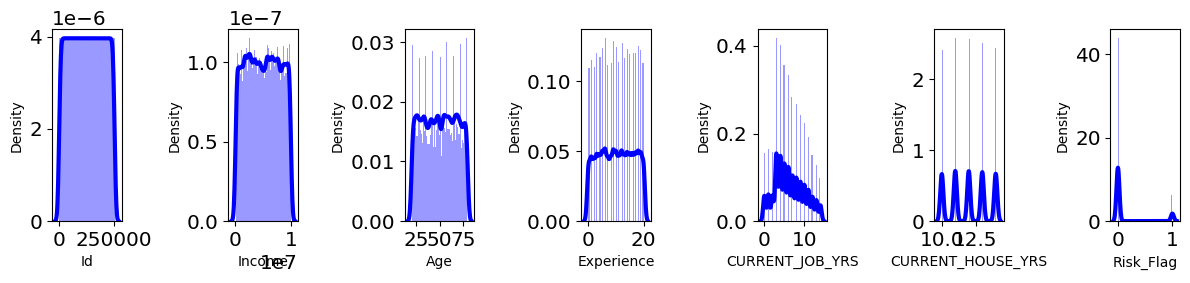

In [12]:
plt.figure(figsize = (12,5))
for i in range(0, len(nums)):
    plt.subplot(2, len(nums), i+1)
    sns.distplot(df[nums[i]], color = 'blue')
    plt.tight_layout()

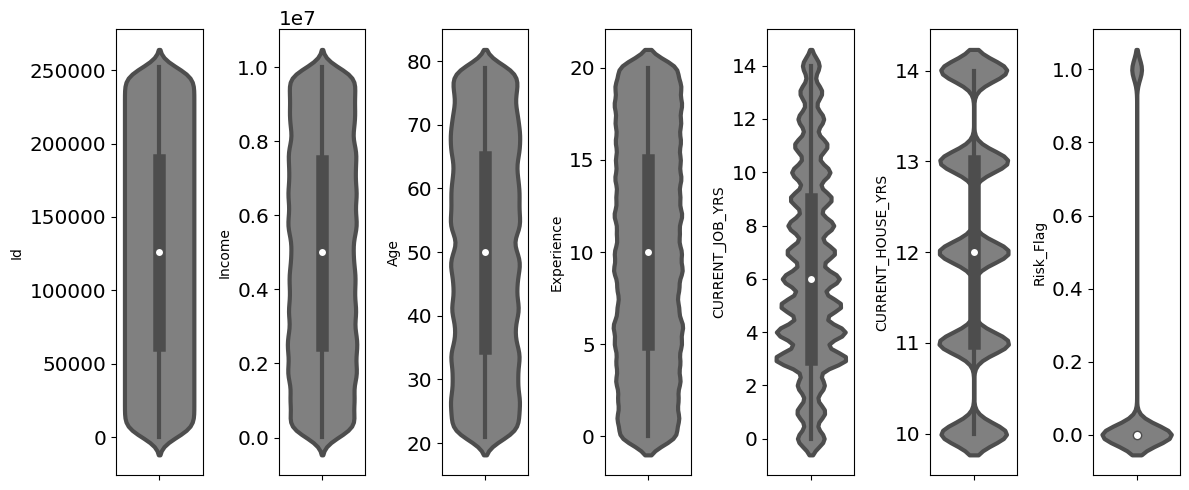

In [13]:
plt.figure(figsize = (12,5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], color = 'gray',orient = 'v')
    plt.tight_layout()

In [14]:
df.corr()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,1.000000,-0.001324,-0.001816,-0.005810,-0.003250,0.001972,0.032153
Income,-0.001324,1.000000,-0.000652,0.006422,0.007045,-0.002397,-0.003091
Age,-0.001816,-0.000652,1.000000,-0.001118,0.002154,-0.020134,-0.021809
Experience,-0.005810,0.006422,-0.001118,1.000000,0.646098,0.019309,-0.034523
CURRENT_JOB_YRS,-0.003250,0.007045,0.002154,0.646098,1.000000,0.005372,-0.016942
CURRENT_HOUSE_YRS,0.001972,-0.002397,-0.020134,0.019309,0.005372,1.000000,-0.004375
Risk_Flag,0.032153,-0.003091,-0.021809,-0.034523,-0.016942,-0.004375,1.000000


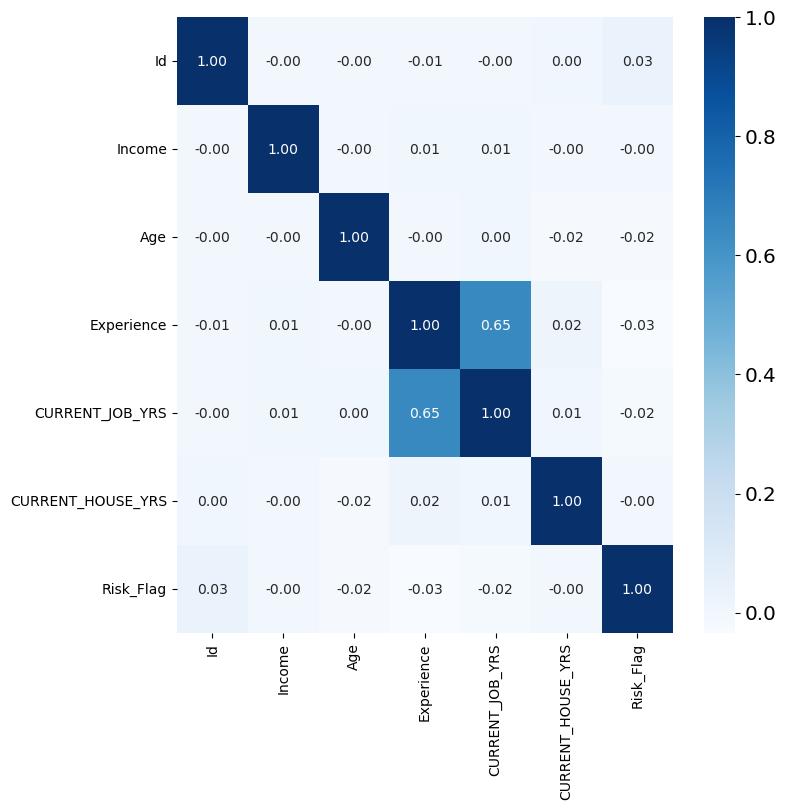

In [15]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), cmap = 'Blues', annot = True, fmt = '.2f')
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
plt.show()

<Figure size 1500x1500 with 0 Axes>

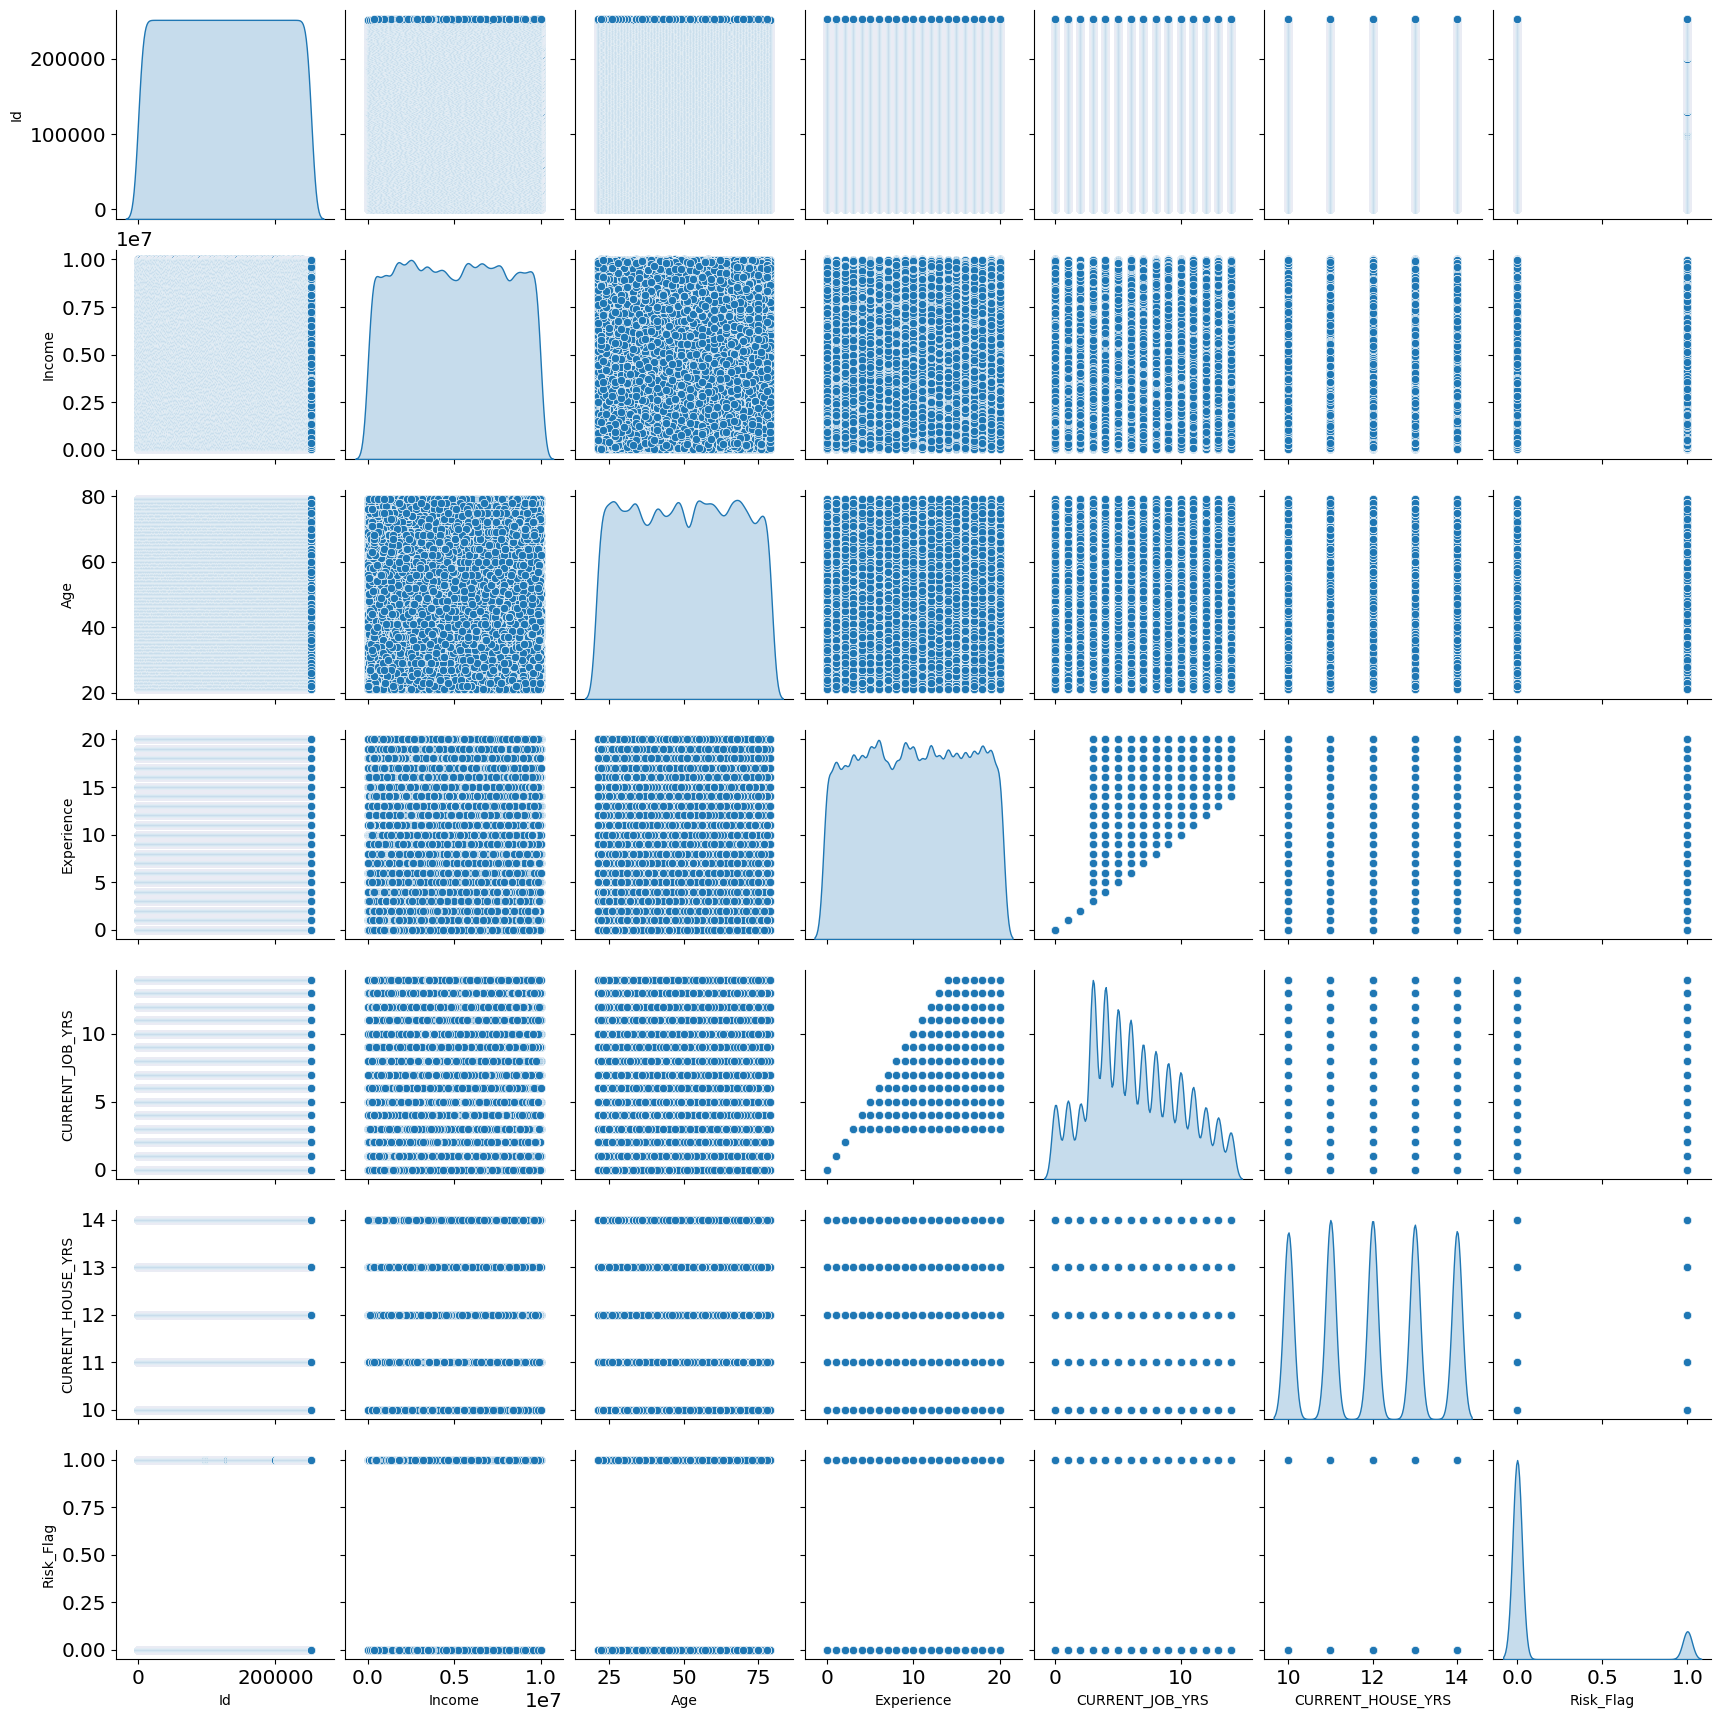

In [16]:
plt.figure(figsize = (15,15))
sns.pairplot(df, diag_kind = 'kde')

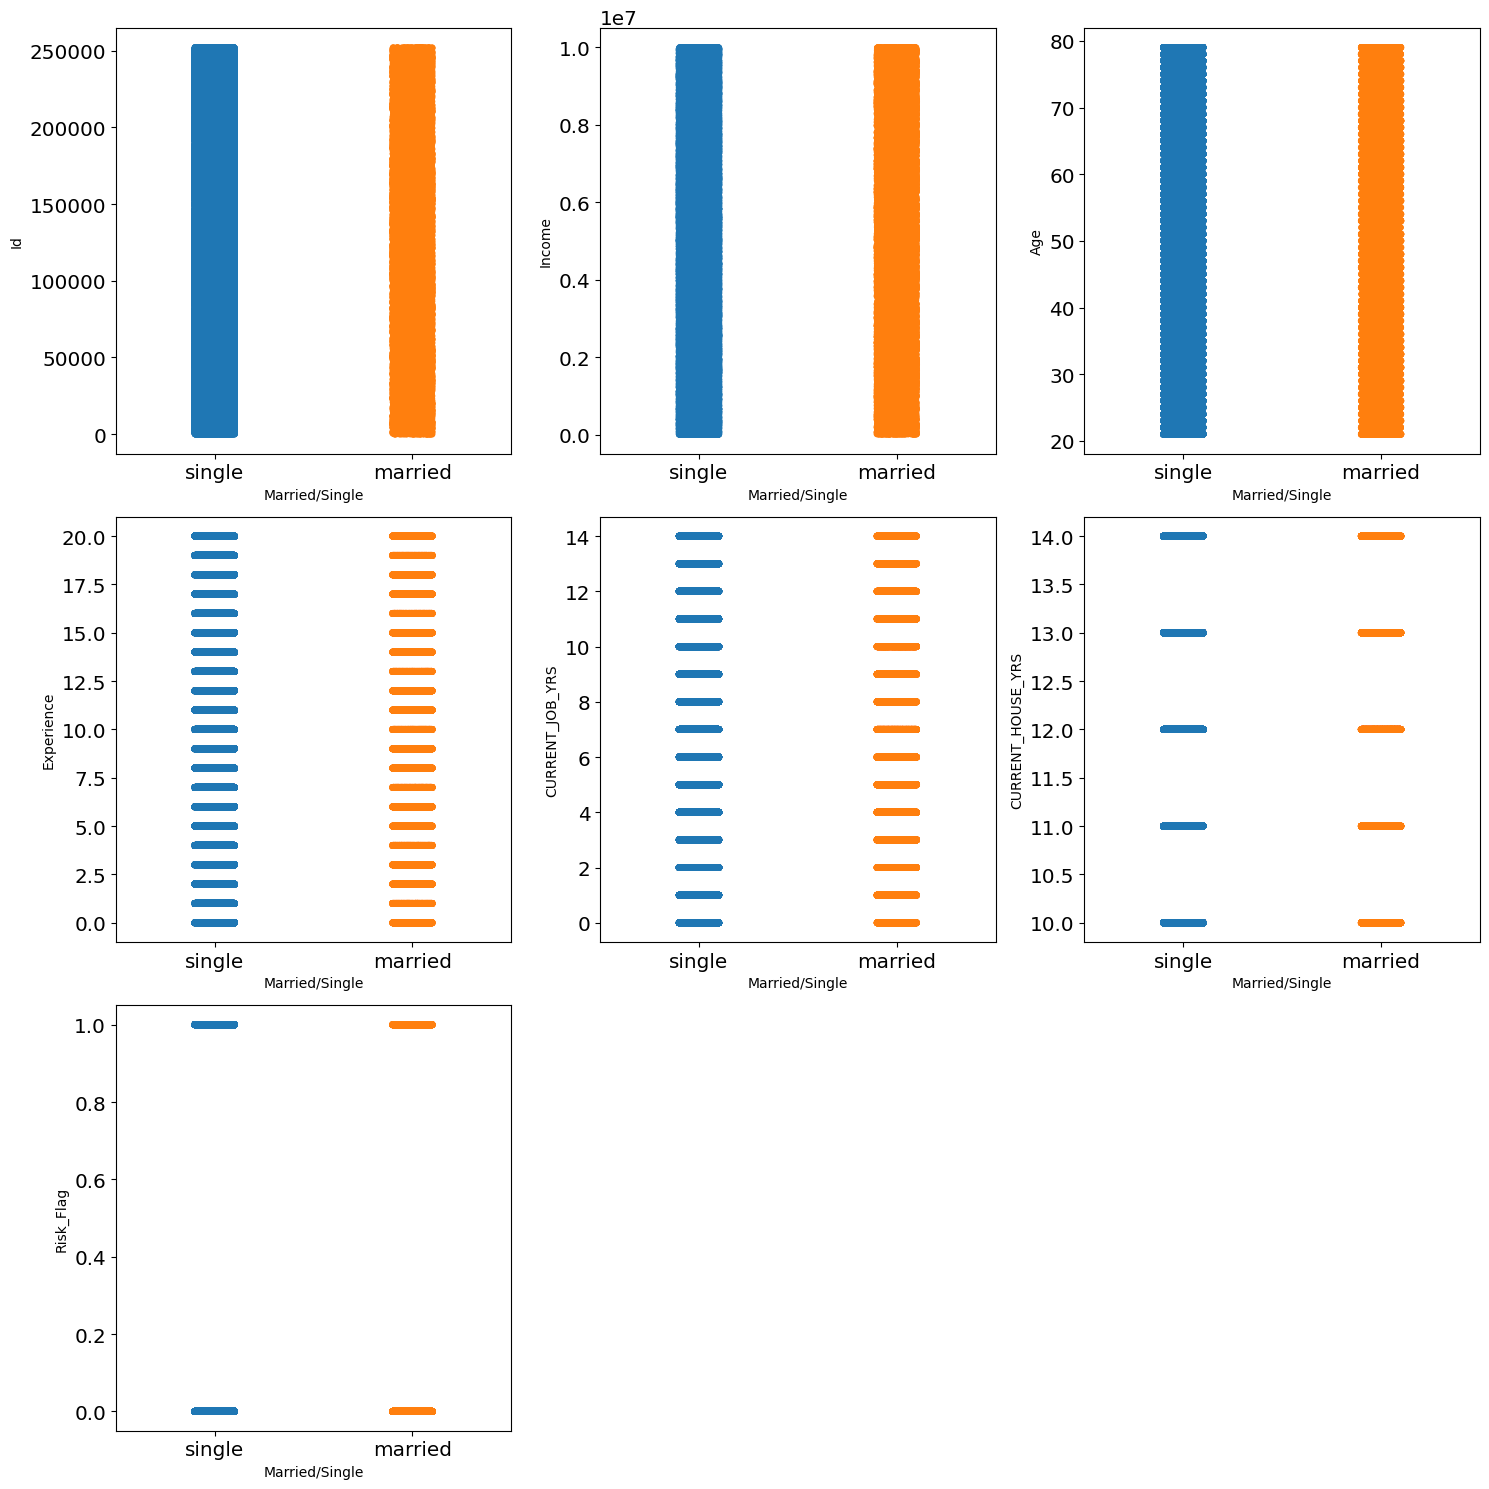

In [17]:
fig = plt.figure(figsize = (15,15))
for i in range (0, len(nums)):
    ax = fig.add_subplot(3, 3, i+1) #set posisi catplot
    sns.stripplot(ax = ax, data=df, x = 'Married/Single', y = nums[i]) #gambar catplot / stripplotnya
    plt.tight_layout()

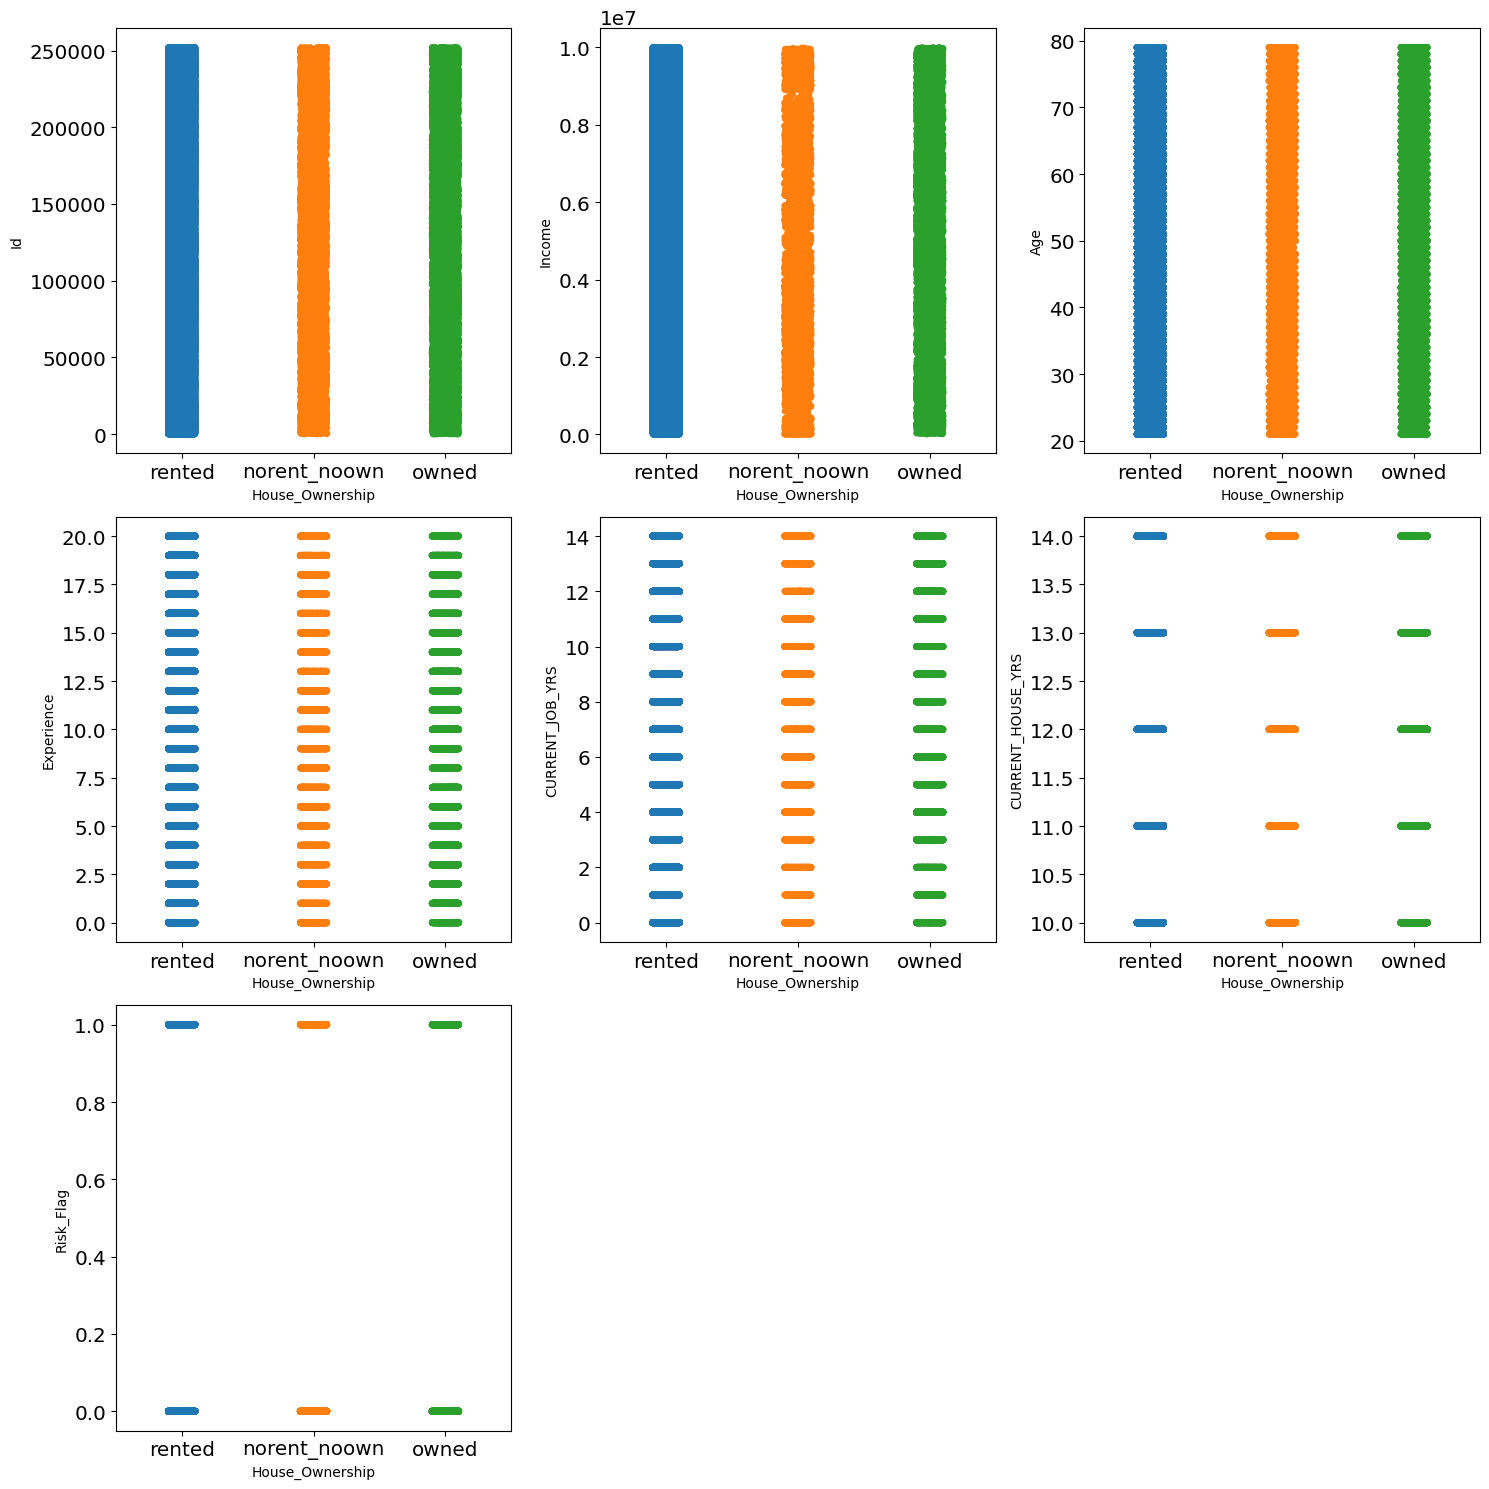

In [18]:
fig = plt.figure(figsize = (15,15))
for i in range (0, len(nums)):
    ax = fig.add_subplot(3, 3, i+1) #set posisi catplot
    sns.stripplot(ax = ax, data=df, x = 'House_Ownership', y = nums[i]) #gambar catplot / stripplotnya
    plt.tight_layout()

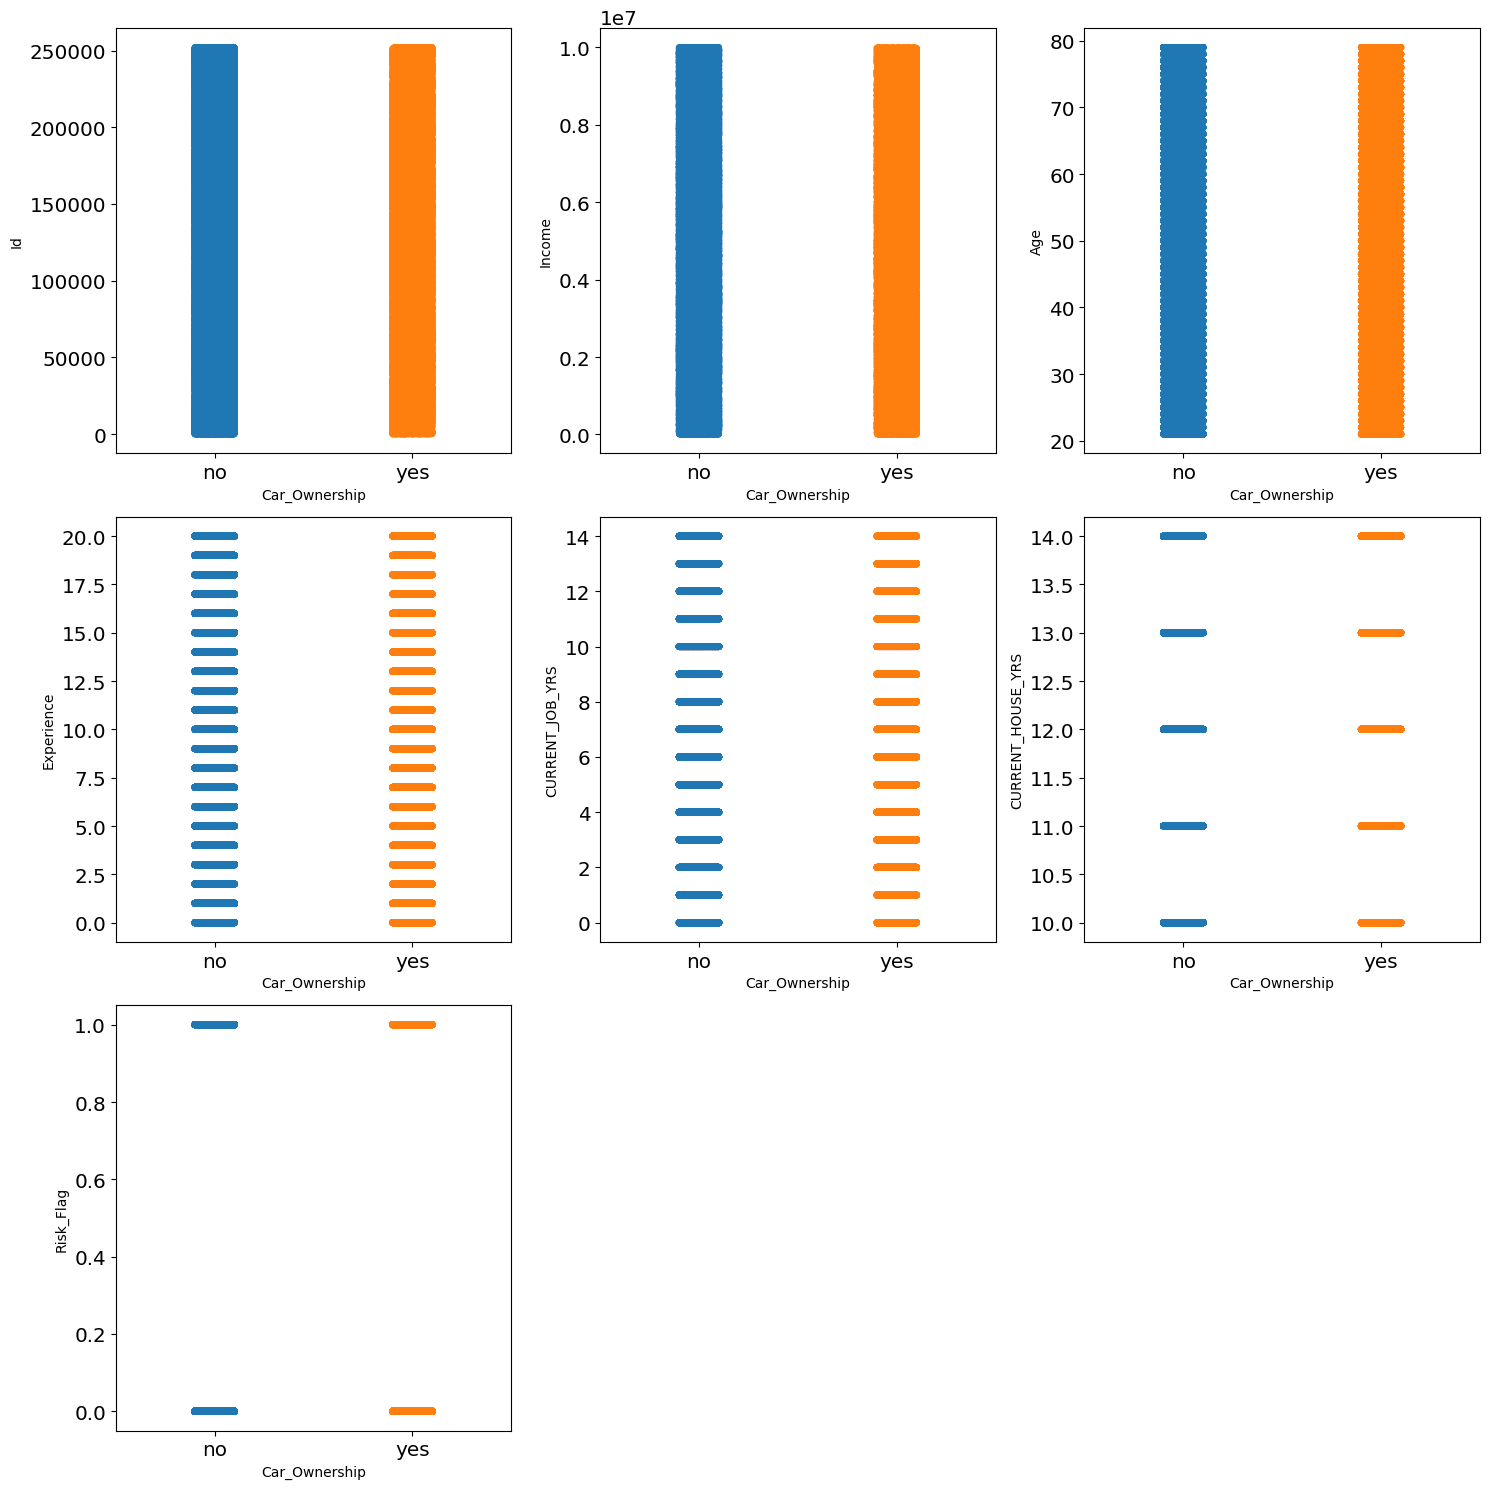

In [19]:
fig = plt.figure(figsize = (15,15))
for i in range (0, len(nums)):
    ax = fig.add_subplot(3, 3, i+1) #set posisi catplot
    sns.stripplot(ax = ax, data=df, x = 'Car_Ownership', y = nums[i]) #gambar catplot / stripplotnya
    plt.tight_layout()

## Business Insight

In [65]:
df_RF = df[df['Risk_Flag'] == 1]
def segment(x):
    if x['CURRENT_JOB_YRS'] >2 and x['CURRENT_JOB_YRS'] < 9:
        segment = 'Mid-Senior Level'
    elif x['CURRENT_JOB_YRS'] < 2:
        segment = 'Entry Level'
    else :
        segment = 'Senior Level'
    return segment


In [66]:
df_RF['current_job_group'] = df_RF.apply(lambda x: segment(x), axis = 1)
df_RF.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12096\181643757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_RF['current_job_group'] = df_RF.apply(lambda x: segment(x), axis = 1)


,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,current_job_group
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,Senior Level
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,Mid-Senior Level
14,15,9420838,48,6,single,rented,no,Technical_writer,Madurai,Tamil_Nadu,6,10,1,Mid-Senior Level
17,18,3666346,56,12,single,rented,no,Politician,Bhusawal,Maharashtra,12,11,1,Senior Level
28,29,8832725,64,5,single,rented,no,Biomedical_Engineer,Pondicherry,Puducherry,5,11,1,Mid-Senior Level


In [67]:
df_jy = pd.DataFrame(df_RF.groupby(['CURRENT_JOB_YRS'])['Risk_Flag'].count()).reset_index()
df_jy_group = pd.DataFrame(df_RF.groupby(['current_job_group'])['Risk_Flag'].count()).reset_index()

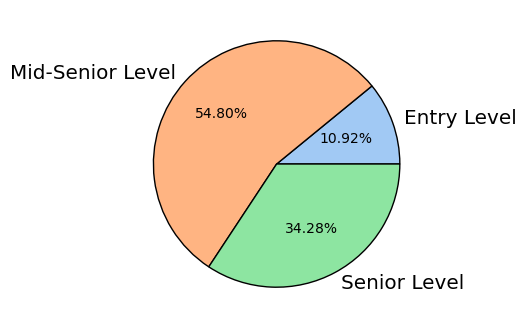

In [68]:
plt.pie(df_jy_group['Risk_Flag'], labels = df_jy_group['current_job_group'], colors = sns.color_palette('pastel'),
          wedgeprops = {"edgecolor":"k"}, autopct = '%.2f%%')
plt.show()

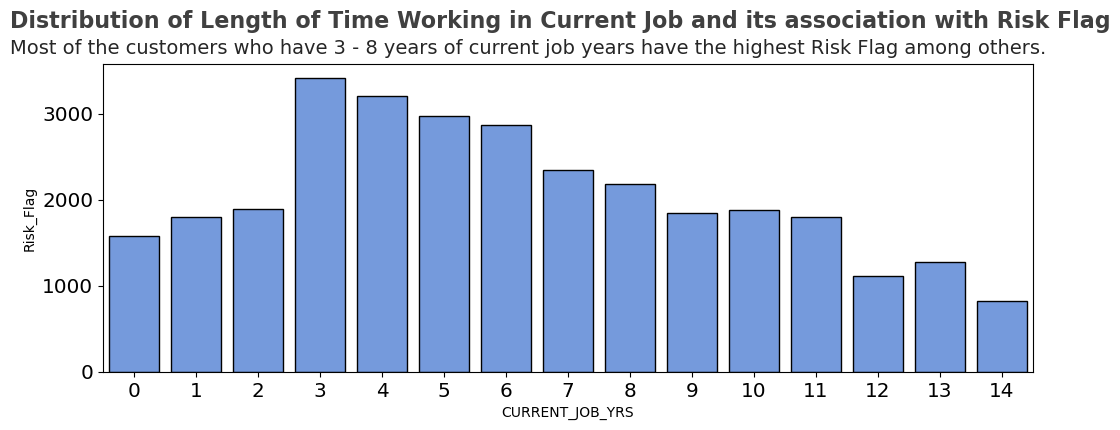

In [70]:
sns.barplot(x = 'CURRENT_JOB_YRS', y = 'Risk_Flag', data = df_jy,
            color = 'cornflowerblue', edgecolor= 'black')


plt.text(x = -2, y = 4000, s = "Distribution of Length of Time Working in Current Job and its association with Risk Flag",
         fontsize = 16, alpha = .75, weight = 'bold')
plt.text(x= -2, y = 3700, s = "Most of the customers who have 3 - 8 years of current job years have the highest Risk Flag among others.",
         fontsize = 14, alpha = .85)
plt.show()

In [71]:
df_RF = df[df['Risk_Flag'] == 1]
df_status = pd.DataFrame(df_RF.groupby(['Married/Single'])['Risk_Flag'].count()).reset_index()

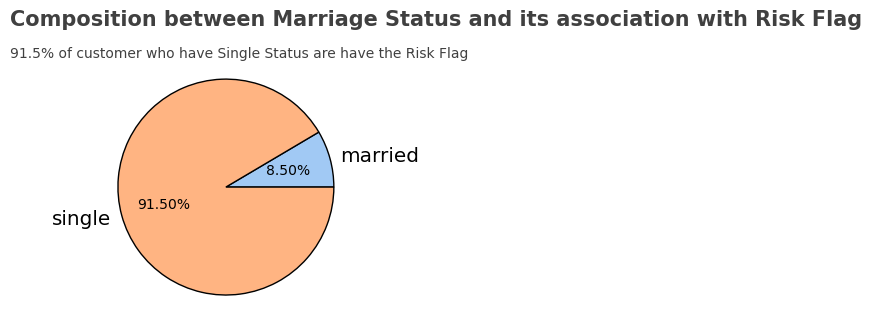

In [93]:
plt.pie(df_status['Risk_Flag'], labels = df_status['Married/Single'], colors = sns.color_palette('pastel'),
        wedgeprops = {"edgecolor":"k"}, autopct = '%.2f%%')
plt.text(x = -2, y = 1.5, s = "Composition between Marriage Status and its association with Risk Flag",
         fontsize = 15, alpha = .75, weight = 'bold')
plt.text(x = -2, y = 1.2, s = "91.5% of the customers who have Single Status are have the Risk Flag",
         fontsize = 10, alpha = .75)
plt.tight_layout(pad = 3.0)

In [73]:
df_RF = df[df['Risk_Flag'] == 1]
df_house = pd.DataFrame(df_RF.groupby(['House_Ownership'])['Risk_Flag'].count()).reset_index()

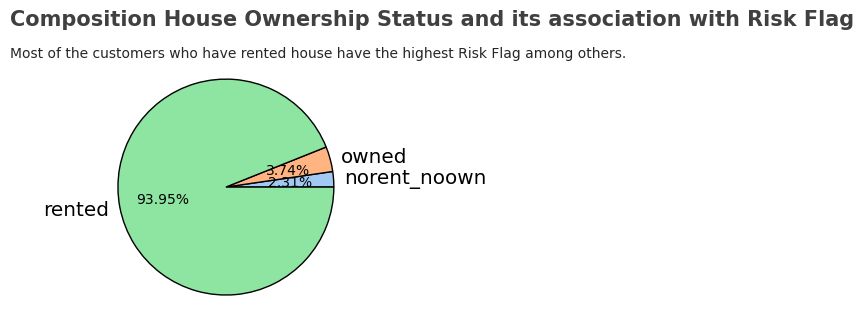

In [107]:
plt.pie(df_house['Risk_Flag'], labels = df_house['House_Ownership'], colors = sns.color_palette('pastel'),
        wedgeprops = {"edgecolor":"k"}, autopct = '%.2f%%')
plt.text(x = -2, y = 1.5, s = "Composition House Ownership Status and its association with Risk Flag",
         fontsize = 15, alpha = .75, weight = 'bold')
plt.text(x = -2, y = 1.2, s = "Most of the customers who have rented house have the highest Risk Flag among others.",
         fontsize = 10, alpha = .85)
plt.tight_layout(pad = 3.0)